In [1]:
import tensorflow as tf
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [5]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)


In [7]:
X_train_gray.shape

(34799, 32, 32, 1)

In [8]:
X_test_gray.shape

(12630, 32, 32, 1)

In [9]:
X_validation.shape

(4410, 32, 32, 3)

In [10]:
X_train_gray/=255

In [ ]:
X_train_gray

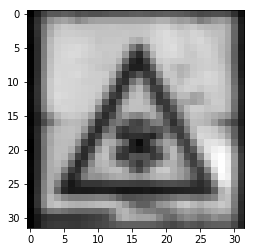

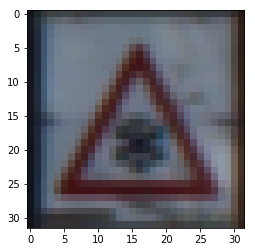

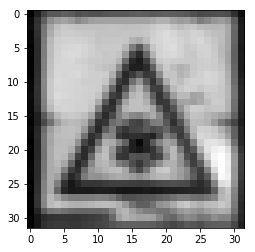

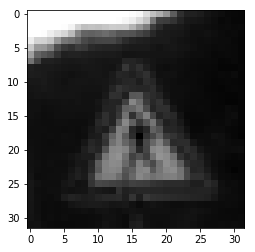

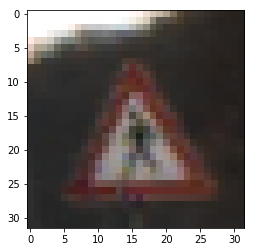

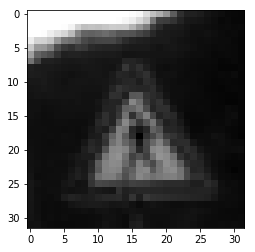

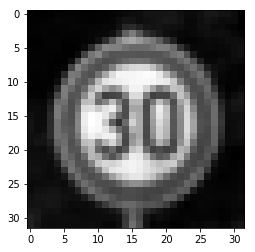

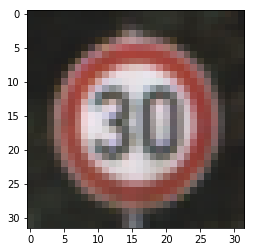

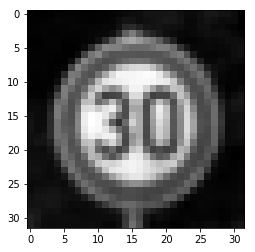

# STEP#4: MODEL TRAINING

The model consists of the following layers:

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

model.add(tf.keras.layers.AveragePooling2d())

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

model.add(tf.keras.layers.AveragePooling2d())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(120,activation='relu'))

model.add(tf.keras.layers.Dense(84, activation='relu'))

model.add(tf.keras.layers.Dense(43, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

W0826 21:57:17.696949 140067402401664 training.py:617] The `nb_epoch` argument in `fit` has been renamed `epochs`.
W0826 21:57:17.740877 140067402401664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 4s 129us/sample - loss: 3.2154 - accuracy: 0.1602 - val_loss: 2.8323 - val_accuracy: 0.2841
Epoch 2/50
34799/34799 [==============================] - 1s 17us/sample - loss: 1.7036 - accuracy: 0.5317 - val_loss: 1.3160 - val_accuracy: 0.6279
Epoch 3/50
34799/34799 [==============================] - 1s 17us/sample - loss: 0.8518 - accuracy: 0.7616 - val_loss: 0.9171 - val_accuracy: 0.7277
Epoch 4/50
34799/34799 [==============================] - 1s 16us/sample - loss: 0.5962 - accuracy: 0.8393 - val_loss: 0.8045 - val_accuracy: 0.7590
Epoch 5/50
34799/34799 [==============================] - 1s 15us/sample - loss: 0.4692 - accuracy: 0.8749 - val_loss: 0.6603 - val_accuracy: 0.7909
Epoch 6/50
34799/34799 [==============================] - 0s 14us/sample - loss: 0.3963 - accuracy: 0.8962 - val_loss: 0.6165 - val_accuracy: 0.8138
Epoch 7/50
34799/34799 [==============================] 

# STEP#5: MODEL EVALUATION

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

12630/12630 [==============================] - 1s 57us/sample - loss: 0.8993 - accuracy: 0.8709
Test Accuracy: 0.8708630204200745


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

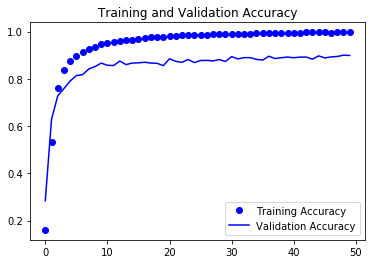

In [ ]:
plt.plot(epochs_hist.history['accuracy'])

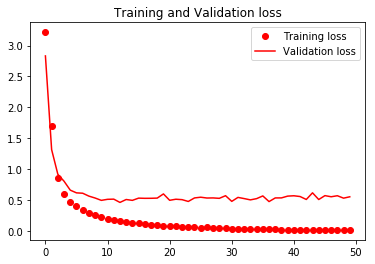

In [ ]:
plt.plot(epochs_hist.history['loss'])

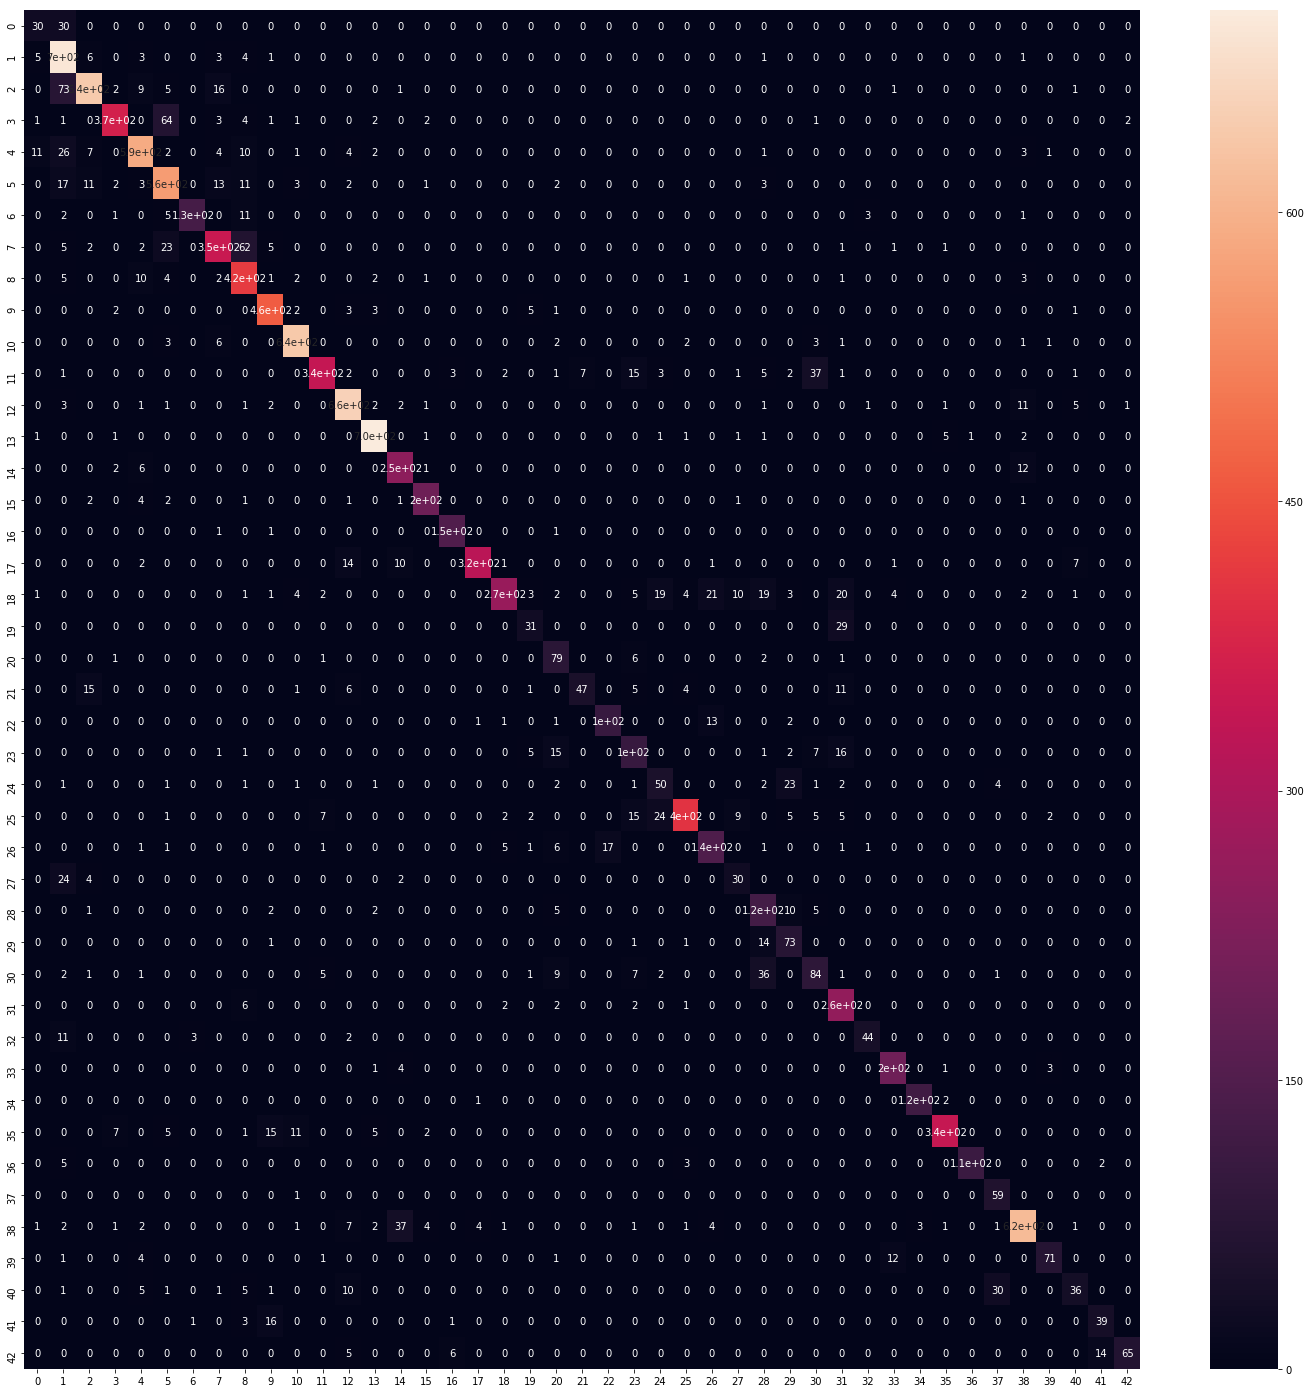

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True)

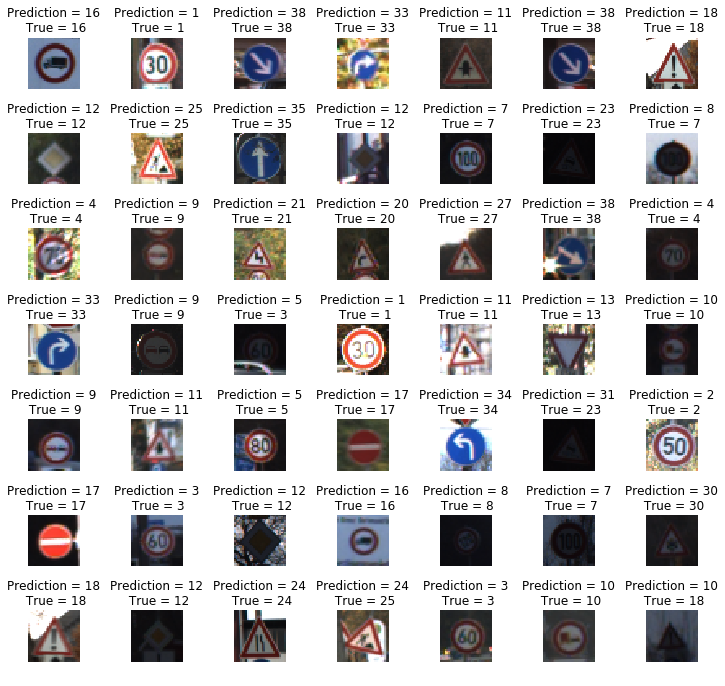

In [ ]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

# GREAT JOB!